# AlBi 3
### Übungsblatt 6
*Markus Apel, Mathias Husted*

### Aufgabe 1: Alignmentstatistik Praxis

d) Stellen Sie die empirische Verteilung der Scores (scores.txt) als Histogram graphisch dar.

Successfully read 20000.0 scores


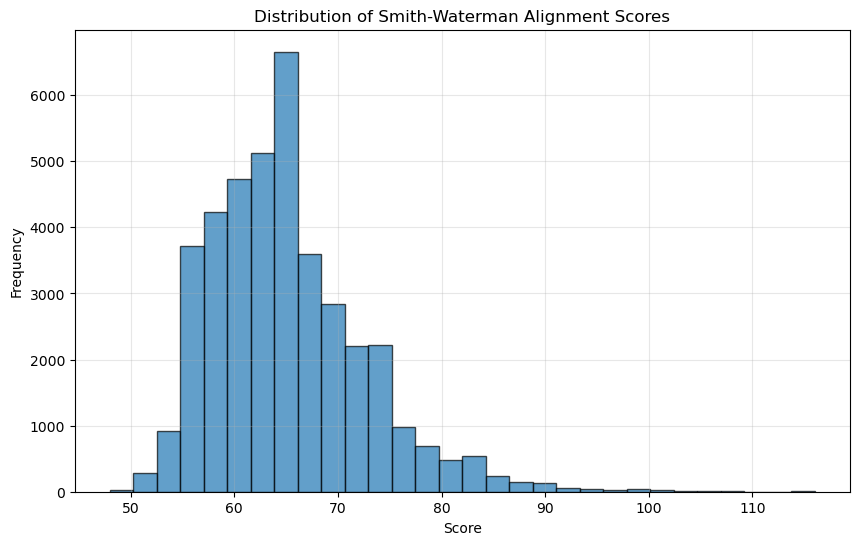

In [26]:
import matplotlib.pyplot as plt

file_path = 'assignment6/scores.txt'

scores = []
with open(file_path, 'r') as f:
    for line in f:
        if line.startswith('#') or line.startswith('>>>'):
            continue
        
        parts = line.strip().split()
        if len(parts) > 4:
            try:
                score = int(parts[5])
                scores.append(score)
            except ValueError:
                continue

print(f"Successfully read {len(scores)/2} scores")

plt.figure(figsize=(10, 6))
plt.hist(scores, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Smith-Waterman Alignment Scores')
plt.grid(True, alpha=0.3)
plt.show()

e) Berechnen Sie den Mittelwert und die Standardabweichung der maximalen Scores.
Stellen Sie graphisch eine Normalverteilung mit den berechneten Parametern
im selben Plot wie das Histogram dar. Achten Sie auf gleiche Maßeinheiten auf
der vertikalen Achse. Was fällt auf? Geben Sie auch eine Erklärung zu Ihren
Beobachtungen

Score range: 48 - 116
Mean score: 65.07
Standard deviation: 7.35


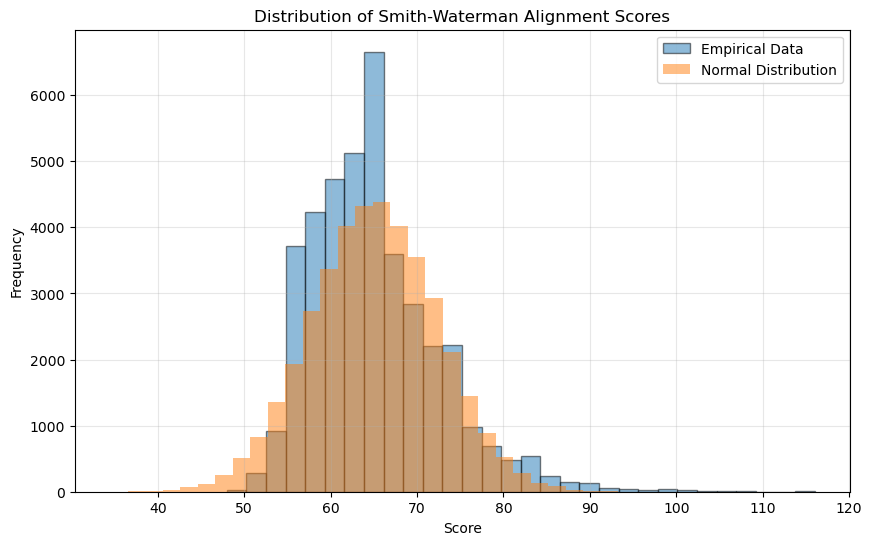

In [27]:
import numpy as np

mean = np.mean(scores)
std_dev = np.std(scores)

print(f"Score range: {min(scores)} - {max(scores)}")
print(f"Mean score: {mean:.2f}")
print(f"Standard deviation: {std_dev:.2f}")

# Generate normal distribution with same size as scores
normal_dist = np.random.normal(loc=mean, scale=std_dev, size=len(scores))

plt.figure(figsize=(10, 6))
plt.hist(scores, bins=30, edgecolor='black', alpha=0.5, label='Empirical Data')
plt.hist(normal_dist, bins=30, alpha=0.5, label='Normal Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Smith-Waterman Alignment Scores')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Es ist zu beobachten, dass hier keine Normalverteilung vorliegt. Es gibt unmittelbar unter dem Mittelwert eine assymetrische Anhäufung von Scores, allerdings weniger Scores, die sehr gering sind. Es gibt einen längeren rechten Schwanz, somit auch mehr "Ausreißer" nach oben.

Da es viele extreme Ausreißer in den höheren Scores gibt, deutet es darauf hin, dass hier eine Extremwertverteilung vorliegt. In diesem Fall eine Gumbel-Verteilung. Diese Ergebnisse sind wie erwartet, da lokale Alignment-Scores von zufälligen Sequenzen dieser Art von Verteilung folgen.

Aus dem Grund können wir in praktischen Anwendungen E-Values basierend auf der Gumbel-Verteilung berechnen, um dier statistische Signifikanz von Alignment-Scores zu bewerten.

f) Leiten Sie aus dem Mittelwert und der Varianz der simulierten Daten eine
mögliche Approximation der simulierten Daten mit einer Gumbel Typ I Extremwertsverteilung ab. Plotten Sie diese über der kumulativen Verteilung der
Daten.

Formeln:

Wahrscheinlichkeit, dass es kein Score besser als S gibt:

$ e^{-E} = e^{-Km \cdot e^{-\lambda S}}$

Kumulative Verteilungsfunktion einer Gumbel Typ 1 Verteilung:

$F(x) = \exp ({-e ^{-\frac{(x-\mu)}{\beta}}})$

Wobei $\mu = m - 0.45 \cdot \sigma$ und $\beta = \frac{\sigma \sqrt{6}}{\pi} = \frac{\sigma}{1.282}$

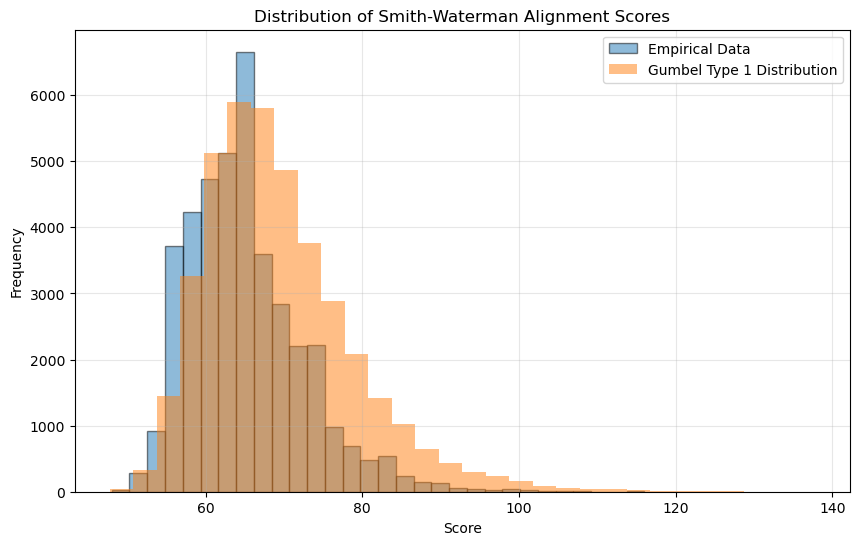

In [28]:
gum_dist = np.random.gumbel(loc=mean, scale=std_dev, size=len(scores))

plt.figure(figsize=(10, 6))
plt.hist(scores, bins=30, edgecolor='black', alpha=0.5, label='Empirical Data')
plt.hist(gum_dist, bins=30, alpha=0.5, label='Gumbel Type 1 Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Smith-Waterman Alignment Scores')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
